# Ejercicios: Parte I

<div class="alert-warning">
    
Indicaciones: Los ejercicios 1, 2, 3 y 4 deben leer su data de links en Github y el código y los resultados deben ser publicados en páginas en Github.

</div>

## Ejercicio 1

<div class="alert-success">
    
1. Use two maps of points.

2. Compute the distance matrix for both maps.

3. Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.
</div>

**1.1. Mapas de puntos a emplear:** 
- Plantas de energía solar en China (China3415_SolarPowerPlants)
- Plantas de energía eólica en China (China3415_WindPowerPlants)

Fuente: [Global Power Plant Database](https://datasets.wri.org/dataset/globalpowerplantdatabase)


Ambos se encuentran proyectados y presentan un CRS de 3415.

In [25]:
import os
import geopandas as gpd

China3415_PowerPlants = "https://github.com/Ciencia-de-datos-espaciales-2023-2/Evaluacion4_1ra-Parte_Mining_GeoDFs/raw/main/maps/China3415_PowerPlants/China3415_PowerPlants.gpkg"
China3415_SolarPowerPlants = gpd.read_file(China3415_PowerPlants,layer="Solar")
China3415_WindPowerPlants = gpd.read_file(China3415_PowerPlants,layer="Wind")

**1.2. Matriz de distancias entre ambos mapas**

Nota: Ambos mapas presentan proyecciones en metros. Pero, la matriz de distancias se encuentra en unidades de kilómetros y recopula distancias entre una planta de energía eólica a una de energía solar.

In [26]:
China3415_SolarPowerPlants_n = China3415_SolarPowerPlants.set_index("SolarPowerPlant_Name")
China3415_WindPowerPlants_n = China3415_WindPowerPlants.set_index("WindPowerPlant_Name")

DistanceMatrix_WindSolarPlants = China3415_WindPowerPlants_n.geometry.apply\
(lambda g: China3415_SolarPowerPlants_n.geometry.distance(g)/1000)

# Visualización de las 5 primeras filas de la matriz de distancias:
DistanceMatrix_WindSolarPlants.head()

SolarPowerPlant_Name,Aksai A,Aksu 1,Aksu A,Aksu B,Aksu C,Aksu D,Aksu E,Aksu F,Aksu Jinko,Ala'er A,...,Zhongwei 30 ZHW,Zhongxin,Zhuanjingzhen A,Zhuanjingzhen B,Zhuanjingzhen C,Zhuanjingzhen D,Zhuanjingzhen E,Zhuanjingzhen F,Zhuanjingzhen G,Zhuozi Bayin
WindPowerPlant_Name,,,,,,,,,,,,,,,,,,,,,
Abag Banner Huiteng Liang Phase 1,1990.422662,3181.257451,3182.821379,3182.529188,3182.306878,3182.371500,3183.209002,3184.188716,3181.660867,3086.424381,...,1192.269778,2357.406846,1002.650319,1000.747025,1001.243222,998.823256,1002.297255,1003.199405,1004.355247,395.103237
Anhui Laian Baoshan Wind,2354.174981,3669.157241,3670.613874,3670.521873,3670.378673,3670.484468,3671.248527,3672.521166,3669.320824,3559.211154,...,1377.284041,1807.072647,1145.412855,1143.034162,1144.581844,1143.415560,1148.515725,1147.177475,1146.925441,1188.905794
Anhui Laian Longtougang Wind,2366.436085,3681.410896,3682.866917,3682.775569,3682.632648,3682.738553,3683.502237,3684.775572,3681.573685,3571.437685,...,1389.801896,1813.783124,1158.128095,1155.751494,1157.299149,1156.136533,1161.233349,1159.892723,1159.638454,1200.862405
Anhui Laian Longwosi Wind,2355.954444,3670.937096,3672.393767,3672.301724,3672.158508,3672.264295,3673.028377,3674.300973,3671.100728,3560.992644,...,1379.040257,1808.577669,1147.133301,1144.754055,1146.301745,1145.134476,1150.235539,1148.897918,1148.646470,1190.121954
Anning River Canyon (Phase 1) Dechang County,1572.310161,2679.343247,2680.444330,2680.607525,2680.581790,2680.720694,2681.277660,2682.705241,2679.192771,2568.934766,...,1198.466757,177.164949,1264.764095,1265.776079,1265.895112,1267.949494,1266.433751,1264.924354,1263.605421,1866.610040


**1.3. Seleccionar una fila de la matriz de distancias y graficas dos puntos con la mínima distancia sobre el mapa del país.**

Se ha seleccionado la fila correspondiente con la planta de energía eólica "Abag Banner Huiteng Liang Phase 1", se determinó a cuál de planta de energía solar se encontraba más cerca y ambos puntos se graficaron en el mapa de China.

In [31]:
# Planta de energía solar más cercana a la planta eólica "Abag Banner Huiteng Liang Phase 1"
DistanceMatrix_WindSolarPlants.loc["Abag Banner Huiteng Liang Phase 1"].idxmin(axis=0)

'Zhenglanqi A'

<Axes: >

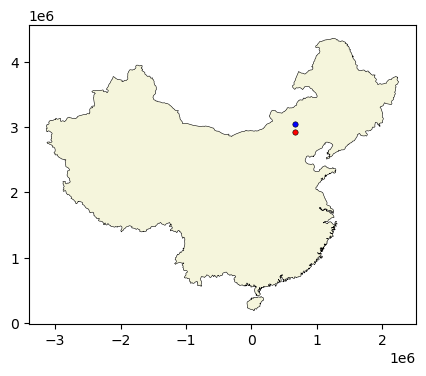

In [58]:
# Mapa de China:
ChinaMaps_3415="https://github.com/Ciencia-de-datos-espaciales-2023-2/Evaluacion4_1ra-Parte_Mining_GeoDFs/raw/main/maps/China3415/ChinaMaps_3415.gpkg"
China3415 = gpd.read_file(ChinaMaps_3415,layer="countries")

#Ambos puntos:
Abag_Banner = China3415_WindPowerPlants[China3415_WindPowerPlants.WindPowerPlant_Name=="Abag Banner Huiteng Liang Phase 1"]
Zhenglanqi = China3415_SolarPowerPlants[China3415_SolarPowerPlants.SolarPowerPlant_Name =="Zhenglanqi A"]

#Mapa de China con ambos puntos
import matplotlib.pyplot as plt

base = China3415.plot(facecolor="beige", edgecolor="black", linewidth=0.4,figsize=(5,5))
Abag_Banner.plot(color="blue",edgecolor="black",label="noss",linewidth=0.4, markersize=15,ax=base)
Zhenglanqi.plot(color="red",edgecolor="black",linewidth=0.4, markersize=15,ax=base)

#Nota: Azul -> Abag Banner Huiteng Liang Phase 1, Rojo -> Zhenglanqi A

## Ejercicio 2

<div class="alert-success">
    
1. Use a map of points and a map of lines.

2. Compute the distance matrix for both maps.

3. Select one line of the distance matrix, and plot the closests and the farthest point to that line. (Se puede seleccionar un río o un sistema y calcular el punto más cercano o lejano a la línea. Si se escoge un punto, se calcula la línea más cercana y lejana)
    
    
</div>

**2.1. Mapas de puntos y líneas a emplear:**
- Mapa de puntos: 

In [95]:
MajorRiverslink = "https://github.com/Ciencia-de-datos-espaciales-2023-2/Evaluacion4_1ra-Parte_Mining_GeoDFs/raw/main/maps/Major_rivers/MajorRivers.shp"
MajorRivers = gpd.read_file(MajorRiverslink)
MajorRivers.to_crs(3415)
MajorRivers.crs
#China_MajorRivers = gpd.clip(gdf=MajorRivers, mask=China3415)

#China_MajorRivers

#China_MajorRivers.to_crs(3415)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Ejercicio 3

<div class="alert-success">
    
1. Create a set of points and a set of polygons

2. Compute the distance matrix for both sets.

3. Select one polygon of the distance matrix, and plot the closests and the farthest point to that polygon. (cualquiera de los dos mapas. Puede ser el mapa estático o el mapa interactivo)
    
</div>   

## Ejercicio 4

<div class="alert-success">
    
1. Create a set of points and a set of lines

2. Get the buffer for the lines, select different values for the distance. Jugar con varias distancias, pero solo colocar una que tenga resultados interesantes en el notebook final.

3. Keep the points that are within the buffer (as in point 2, you need to play with differn distances until you show something interesting. Todos los puntos que están dentro del buffer creado para la línea.
   

</div>   